# UBER DRIVER DATA


- Link github: https://github.com/ZandiMathibela/Data-Science
- Data source: Chatgpt generated
- Data description: Uber Insights encompasses several key metrics associated with drivers in a taxi service, or Uber. It includes details such as the number of hours worked, total trips completed, average trip distance in miles, total earnings in dollars, customer ratings ranging from 1 to 5, and the experience of drivers measured in months. Each row in the dataset represents a different driver, while the columns capture diverse aspects of their performance and tenure within the platform. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from collections import Counter
from statistics import mode
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv("data\data.csv")
df.head()

,Driver ID,Hours Worked,Hours Worked (in order),Total Trips,Total Trips(in order),Avg. Trip Distance (miles),Avg. Trip Distance (miles)- in order,Total Earnings ($),Total Earnings ($) (in order),Customer Ratings,Experience (months),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,40,NaN,50,NaN,5.2,NaN,600,NaN,4.5,24,NaN,NaN,NaN,NaN,NaN,NaN
1,2,35,NaN,45,NaN,6.8,NaN,550,NaN,4.8,20,NaN,NaN,NaN,NaN,NaN,NaN
2,3,45,NaN,60,NaN,4.5,NaN,700,NaN,4.3,36,NaN,NaN,NaN,NaN,NaN,NaN
3,4,50,NaN,55,NaN,7.3,NaN,680,NaN,4.7,28,NaN,NaN,NaN,NaN,NaN,NaN
4,5,48,NaN,52,NaN,5.9,NaN,620,NaN,4.6,32,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,Driver ID,Hours Worked,Hours Worked (in order),Total Trips,Total Trips(in order),Avg. Trip Distance (miles),Avg. Trip Distance (miles)- in order,Total Earnings ($),Total Earnings ($) (in order),Customer Ratings,Experience (months),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
286,296,34,NaN,46,NaN,6.1,NaN,540,NaN,4.6,26,NaN,NaN,NaN,NaN,NaN,NaN
287,297,39,NaN,50,NaN,5.2,NaN,580,NaN,4.4,28,NaN,NaN,NaN,NaN,NaN,NaN
288,298,43,NaN,57,NaN,4.8,NaN,630,NaN,4.7,30,NaN,NaN,NaN,NaN,NaN,NaN
289,299,35,NaN,47,NaN,5.8,NaN,550,NaN,4.8,23,NaN,NaN,NaN,NaN,NaN,NaN
290,300,38,NaN,52,NaN,5.4,NaN,590,NaN,4.2,28,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

### Checking for null data

In [4]:
print(df.shape)
df.isnull().sum()

(291, 17)


Driver ID                                 0
Hours Worked                              0
Hours Worked (in order)                 291
Total Trips                               0
Total Trips(in order)                   291
Avg. Trip Distance (miles)                0
Avg. Trip Distance (miles)- in order    291
Total Earnings ($)                        0
Total Earnings ($) (in order)           291
Customer Ratings                          0
Experience (months)                       0
Unnamed: 11                             291
Unnamed: 12                             291
Unnamed: 13                             291
Unnamed: 14                             291
Unnamed: 15                             291
Unnamed: 16                             291
dtype: int64

### Checking for NA data

In [5]:
df.isna().sum()

Driver ID                                 0
Hours Worked                              0
Hours Worked (in order)                 291
Total Trips                               0
Total Trips(in order)                   291
Avg. Trip Distance (miles)                0
Avg. Trip Distance (miles)- in order    291
Total Earnings ($)                        0
Total Earnings ($) (in order)           291
Customer Ratings                          0
Experience (months)                       0
Unnamed: 11                             291
Unnamed: 12                             291
Unnamed: 13                             291
Unnamed: 14                             291
Unnamed: 15                             291
Unnamed: 16                             291
dtype: int64

### Remove NaN column

In [6]:
df.columns

Index(['Driver ID', 'Hours Worked', 'Hours Worked (in order)', 'Total Trips',
       'Total Trips(in order)', 'Avg. Trip Distance (miles)',
       'Avg. Trip Distance (miles)- in order', 'Total Earnings ($)',
       'Total Earnings ($) (in order)', 'Customer Ratings',
       'Experience (months)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [7]:
df.drop( 
    columns=['Hours Worked (in order)', 'Driver ID', 'Total Trips(in order)', 'Avg. Trip Distance (miles)- in order', 'Total Earnings ($) (in order)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
    inplace=True,
    axis=1
)

df

,Hours Worked,Total Trips,Avg. Trip Distance (miles),Total Earnings ($),Customer Ratings,Experience (months)
0,40,50,5.2,600,4.5,24
1,35,45,6.8,550,4.8,20
2,45,60,4.5,700,4.3,36
3,50,55,7.3,680,4.7,28
4,48,52,5.9,620,4.6,32
...,...,...,...,...,...,...
286,34,46,6.1,540,4.6,26
287,39,50,5.2,580,4.4,28
288,43,57,4.8,630,4.7,30
289,35,47,5.8,550,4.8,23


In [8]:
df.isnull().sum()

Hours Worked                  0
Total Trips                   0
Avg. Trip Distance (miles)    0
Total Earnings ($)            0
Customer Ratings              0
Experience (months)           0
dtype: int64

# STATISTICS DESCRIPTION

### HOURS WORKED



In [16]:
# Range
def data_range(data):
    return max(data) - min(data)
# Minimum formula
def minimum(data):
    return min(data)

# Maximum formula
def maximum(data):
    return max(data)
def sum(data):
    t_sum = 0
    for n in data:
        t_sum += n
    return t_sum

# Mean formula
def mean(data):
    return sum(data) / len(data)

# Mode formula
def mode(data):
    counter = Counter(data)
    max_frequency = max(counter.values())
    mode_values = [key for key, val in counter.items() if val == max_frequency]
    return mode_values

# Median formula
def median(data):
    sorted_data = sorted(data)
    n = len(data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]
        
# Standard deviation formula
def std_dev(data):
    mu = mean(data)
    variance = sum((x - mu) ** 2 for x in data) / len(data)
    return variance ** 0.5
    
# Variance formula
def variance(data):
    z = len(data)
    mean_val = mean(data)
    sum_squared_diff = sum((x - mean_val) ** 2 for x in data)
    return sum_squared_diff / z

# Quartiles formula
def quartiles(data):
    sorted_data = sorted(data)
    n = len(data)
    q1 = median(sorted_data[:n//2])
    q2 = median(sorted_data)
    q3 = median(sorted_data[(n+1)//2:])
    return q1, q2, q3

# Interquartile Range (IQR)
def iqr(data):
    q1, _, q3 = np.percentile(data, [25, 50, 75])
    return q3 - q1

# Coefficient of Variation
def cv(data):
    return (std_dev(data) / mean(data)) * 100

# Skewness
def calc_skewness(data):
    return skew(data)

# Kurtosis
def calc_kurtosis(data):
    return kurtosis(data)

# Z-Score
hours_worked_data_point = 10
def calc_zscore(data_point, data):
    mean_val = mean(data)
    std_dev_val = std_dev(data)
    return (data_point - mean_val) / std_dev_val

# Define function to calculate z-score
def calc_zscore(data_point, data):
    mean_val = mean(data)
    std_dev_val = std_dev(data)
    return (data_point - mean_val) / std_dev_val

# Hours worked actual data
Hours_worked = [40,35, 45, 50, 48, 34, 39, 43, 35, 38]

# Z-score for a data point
hours_worked_data_point = 50  # Data point
hours_worked_data_point_five = 38 
hours_worked_data_point_four = 40


##DESCRIPTIVE ANALYSIS
print("Range for HoursWorked = ", data_range(Hours_worked))
print("Minimum of HoursWorked =", minimum(Hours_worked))
print("Maximum of HoursWorked:", maximum(Hours_worked))
print("Sum of HoursWorked = ", sum(Hours_worked))
print("Mean of HoursWorked = ", mean(Hours_worked))
print("Mode of HoursWorked = ", mode(Hours_worked))
print("Median of HoursWorked = ", median(Hours_worked))
print("Standard Deviation of HoursWorked = ", std_dev(Hours_worked))
print("Variance of HoursWorked = ", variance(Hours_worked))
print("Coefficient of Variation (CV) for HoursWorked = ", cv(Hours_worked))
print("Interquartile Range (IQR) for HoursWorked = ", iqr(Hours_worked))
print("Skewness = ", calc_skewness(Hours_worked))
print("Kurtosis = ", calc_kurtosis(Hours_worked))
print("Z-score for", hours_worked_data_point, "hours worked = ", calc_zscore(hours_worked_data_point, Hours_worked))
print("Z-score for", hours_worked_data_point_five, "hours worked = ", calc_zscore(hours_worked_data_point_five, Hours_worked))
print("Z-score for", hours_worked_data_point_four, "hours worked = ", calc_zscore(hours_worked_data_point_four, Hours_worked))



Range for HoursWorked =  16
Minimum of HoursWorked = 34
Maximum of HoursWorked: 50
Sum of HoursWorked =  407
Mean of HoursWorked =  40.7
Mode of HoursWorked =  [35]
Median of HoursWorked =  39.5
Standard Deviation of HoursWorked =  5.330103188494572
Variance of HoursWorked =  28.410000000000004
Coefficient of Variation (CV) for HoursWorked =  13.096076630207792
Interquartile Range (IQR) for HoursWorked =  8.75
Skewness =  0.3889367219275044
Kurtosis =  -1.1566424214446274
Z-score for 50 hours worked =  1.7448067459697112
Z-score for 38 hours worked =  -0.5065567972170136
Z-score for 40 hours worked =  -0.13132954001922614


### TOTAL EARNINGS

In [15]:
# Range
def data_range(data):
    return max(data) - min(data)

# Min Formula
def minimum(data):
    return min(data)

# Max Formula
def maximum(data):
    return max(data)
def sum(data):
    t_sum = 0
    for n in data:
        t_sum += n
    return t_sum

# Mean Formula
def mean(data):
    return sum(data) / len(data)

# Mode Formula
def mode(data):
    counter = Counter(data)
    max_frequency = max(counter.values())
    mode_values = [key for key, val in counter.items() if val == max_frequency]
    return mode_values
    
# Median Formula
def median(data):
    sorted_data = sorted(data)
    n = len(data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]

# Standard Deviation
def std_dev(data):
    mu = mean(data)
    variance = sum((x - mu) ** 2 for x in data) / len(data)
    return variance ** 0.5
    
# Variance Formula
def variance(data):
    N = len(data)
    mean_val = mean(data)
    sum_squared_diff = sum((x - mean_val) ** 2 for x in data)
    return sum_squared_diff / N

# Quartiles
def quartiles(data):
    sorted_data = sorted(data)
    n = len(data)
    q1 = median(sorted_data[:n//2])
    q2 = median(sorted_data)
    q3 = median(sorted_data[(n+1)//2:])
    return q1, q2, q3

# Interquartile Range (IQR)
def iqr(data):
    q1, _, q3 = np.percentile(data, [25, 50, 75])
    return q3 - q1

# Coefficient of Variation 
def cv(data):
    return (std_dev(data) / mean(data)) * 100

# Calculate Skewness
def calc_skewness(data):
    return skew(data)

# Calculate Kurtosis
def calc_kurtosis(data):
    return kurtosis(data)

#calculate zscore
hours_worked_data_point = 10
def calc_zscore(data_point, data):
    mean_val = mean(data)
    std_dev_val = std_dev(data)
    return (data_point - mean_val) / std_dev_val

# Define function to calculate z-score
def calc_zscore(data_point, data):
    mean_val = mean(data)
    std_dev_val = std_dev(data)
    return (data_point - mean_val) / std_dev_val

# Total earnings actual data
Total_Earnings = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]

# Z-score for a data point
total_earnings_data_point = 540  # Data point
total_earnings_data_point_five = 590 # 
total_earnings_data_point_four = 700 # 

##DESCRIPTIVE ANALYSIS
print("Range for Total Earnings = ", data_range(Total_Earnings))
print("Minimum of Total Earnings = ", minimum(Total_Earnings))
print("Maximum of Total Earnings = ", maximum(Total_Earnings))
print("Sum of Total Earnings = ", sum(Total_Earnings))
print("Mean of Total Earnings = ", mean(Total_Earnings))
print("Mode of Total Earnings = ", mode(Total_Earnings))
print("Median of Total Earnings = ", median(Total_Earnings))
print("Standard Deviation of Total Earnings = ", std_dev(Total_Earnings))
print("Variance of Total Earnings = ", variance(Total_Earnings))
print("Coefficient of Variation (CV) for Total Earnings = ", cv(Total_Earnings))
print("Interquartile Range (IQR) for Total Earnings = ", iqr(Total_Earnings))
print("Skewness = ", calc_skewness(Total_Earnings))
print("Kurtosis = ", calc_kurtosis(Total_Earnings))
print("Z-score for", total_earnings_data_point, "Total Earnings = ", calc_zscore(total_earnings_data_point, Total_Earnings))
print("Z-score for", total_earnings_data_point_five, "Total Earnings = ", calc_zscore(total_earnings_data_point_five, Total_Earnings))
print("Z-score for", total_earnings_data_point_four, "Total Earnings = ", calc_zscore(total_earnings_data_point_four, Total_Earnings))

Range for Total Earnings =  160
Minimum of Total Earnings =  540
Maximum of Total Earnings =  700
Sum of Total Earnings =  6040
Mean of Total Earnings =  604.0
Mode of Total Earnings =  [550]
Median of Total Earnings =  595.0
Standard Deviation of Total Earnings =  51.61395160225576
Variance of Total Earnings =  2664.0
Coefficient of Variation (CV) for Total Earnings =  8.545356225539033
Interquartile Range (IQR) for Total Earnings =  70.0
Skewness =  0.5466780849033663
Kurtosis =  -0.8445066688309932
Z-score for 540 Total Earnings =  -1.2399748132674058
Z-score for 590 Total Earnings =  -0.27124449040224496
Z-score for 700 Total Earnings =  1.8599622199011085


### HISTOGRAMS

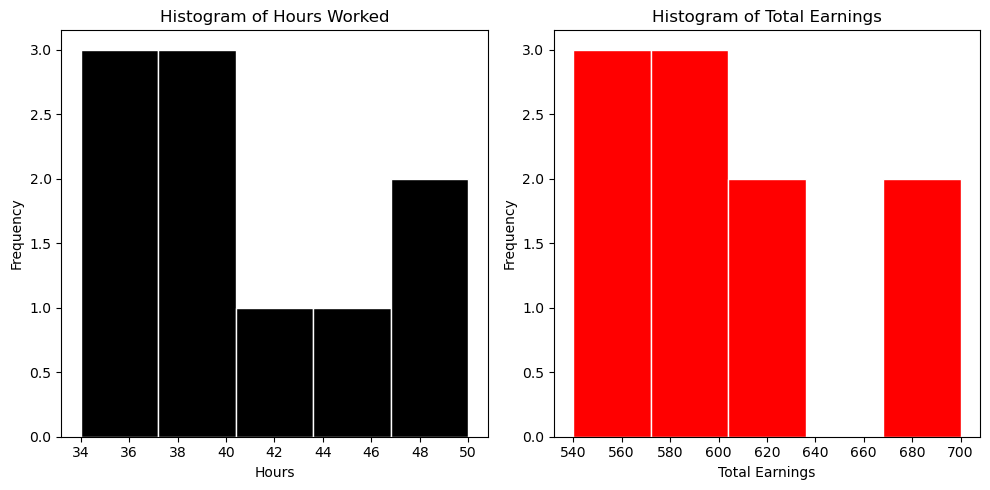

In [29]:

# Hours worked data. These are actual data values from the table above after cleaning the data just before statistics description.
hours_worked_data = [40,35, 45, 50, 48, 34, 39, 43, 35, 38]

# Total earning data. These are actual data values from the table above after cleaning the data just before statistics description.
total_earnings_data = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]

# Histogram graph
plt.figure(figsize=(10, 5))

# Hours Worked
plt.subplot(1, 2, 1)
plt.hist(hours_worked_data, bins=5, color='black', edgecolor='white')
plt.title('Histogram of Hours Worked')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Total Earnings
plt.subplot(1, 2, 2)
plt.hist(total_earnings_data, bins=5, color='red', edgecolor='white')
plt.title('Histogram of Total Earnings')
plt.xlabel('Total Earnings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### SCATTER PLOT FOR HOURS WORKED AND TOTAL EARNINGS

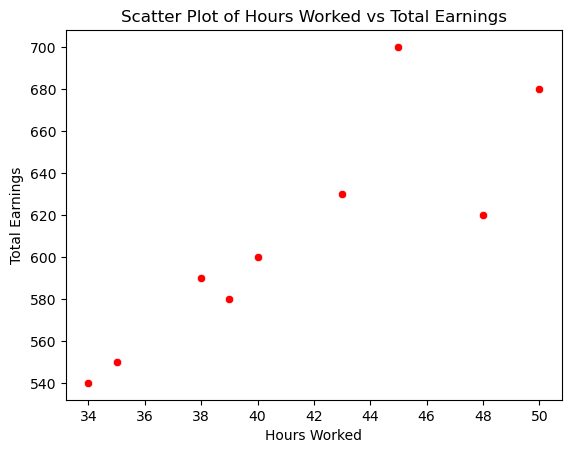

In [30]:
# Hours Worked & Total Earnings
# These are actual data values from the table above after cleaning the data just before statistics description.
hours_worked_data = [40,35, 45, 50, 48, 34, 39, 43, 35, 38]
total_earnings_data = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]


sns.scatterplot(x=hours_worked_data, y=total_earnings_data, color='red')
plt.title('Scatter Plot of Hours Worked vs Total Earnings')
plt.xlabel('Hours Worked')
plt.ylabel('Total Earnings')

plt.show()

In [ ]:
# We can see outliers like 'Hours Worked : 48' to 'Total Earnings' : 620' & 'Hours Worked : 45' to 'Total Earnings : 700'.

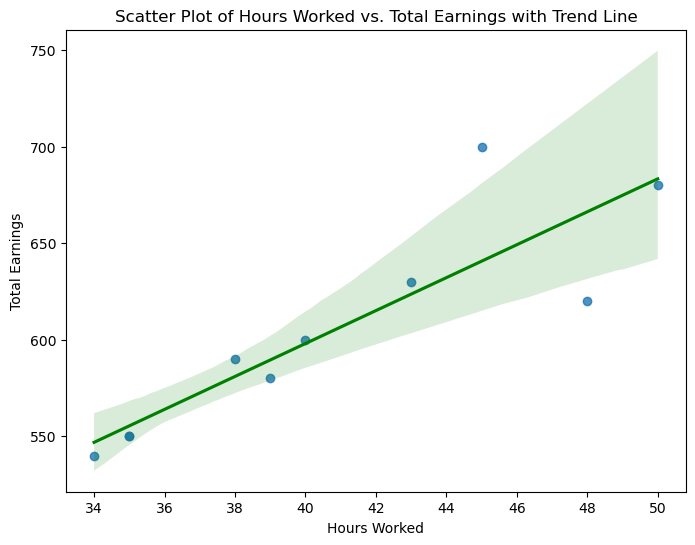

In [24]:
# Scatter Plot with Trend Line
hours_worked_data = [40,35, 45, 50, 48, 34, 39, 43, 35, 38]
total_earnings_data = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]
plt.figure(figsize=(8, 6))
sns.regplot(x=hours_worked_data, y=total_earnings_data, scatter=True, line_kws={"color": "green"})
plt.title('Scatter Plot of Hours Worked vs. Total Earnings with Trend Line')
plt.xlabel('Hours Worked')
plt.ylabel('Total Earnings')
plt.show()

In [ ]:
# We can see from the above scatterplot that the dots are closer to the trend line which indicates that when Hours worked are increased, total earnings
# will increase.

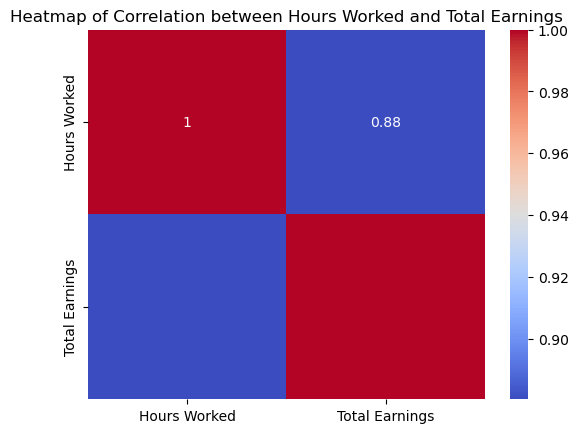

In [32]:
correlation_matrix = np.corrcoef(hours_worked_data, total_earnings_data)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Hours Worked', 'Total Earnings'], yticklabels=['Hours Worked', 'Total Earnings'])
plt.title('Heatmap of Correlation between Hours Worked and Total Earnings')
plt.show()

In [ ]:
# With the above heatmap we see that there is a 1 which indicates a positive strong correlation. We cna deduce that when the hours worked increase, 
# the other variable (total earnings) increases positively too.
# The correlation coefficient of 0.88 indicates a strong postive correlation but not perfect.

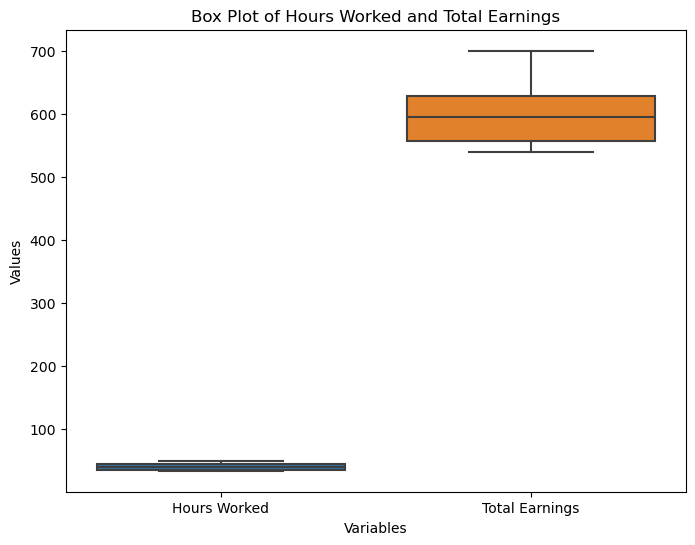

In [31]:
# These are actual data values from the table above after cleaning the data just before statistics description.
hours_worked_data = [40,35, 45, 50, 48, 34, 39, 43, 35, 38]
total_earnings_data = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[hours_worked_data, total_earnings_data])
plt.title('Box Plot of Hours Worked and Total Earnings')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks([0, 1], ['Hours Worked', 'Total Earnings'])
plt.show()

### CONCLUSION BETWEEN THE 'HOURS WORKED' & 'TOTAL EARNINGS' RELATIONSHIP

In [ ]:
# We used various statistical techniques and visualizations to demonstrate the relationship between hours worked and total earnings. 
# To conlcude, the higher the hours worked, the higher the earnings. 

In [32]:
### TOTAL TRIPS

# Range
def data_range(data):
    return max(data) - min(data)
    
# Min
def minimum(data):
    return min(data)

# Max
def maximum(data):
    return max(data)
    
# Sum
def sum(data):
    t_sum = 0
    for n in data:
        t_sum += n
    return t_sum

# Mean
def mean(data):
    return sum(data) / len(data)

# Mode
def mode(data):
    frequency = {}
    for value in data:
        frequency[value] = frequency.get(value, 0) + 1
    max_frequency = max(frequency.values())
    mode_values = [key for key, val in frequency.items() if val == max_frequency]
    return mode_values

# Median
def median(data):
    sorted_data = sorted(data)
    n = len(data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]

# Standard Deviation
def std_dev(data):
    mu = mean(data)
    variance = sum((x - mu) ** 2 for x in data) / len(data)
    return variance ** 0.5
    
# Variance
def variance(data):
    N = len(data)
    mean_val = mean(data)
    sum_squared_diff = sum((x - mean_val) ** 2 for x in data)
    return sum_squared_diff / N

# Calculate quartiles
def quartiles(data):
    sorted_data = sorted(data)
    n = len(data)
    q1 = median(sorted_data[:n//2])
    q2 = median(sorted_data)
    q3 = median(sorted_data[(n+1)//2:])
    return q1, q2, q3

# Interquartile Range (IQR)
def iqr(data):
    q1, _, q3 = np.percentile(data, [25, 50, 75])
    return q3 - q1

# Coefficient of Variation
def cv(data):
    return (std_dev(data) / mean(data)) * 100

# Skewness
def calc_skewness(data):
    return skew(data)

# Calculate Kurtosis
def calc_kurtosis(data):
    return kurtosis(data)

# Calculate z-score
hours_worked_data_point = 10
def calc_zscore(data_point, data):
    mean_val = mean(data)
    std_dev_val = std_dev(data)
    return (data_point - mean_val) / std_dev_val

# Example data for 'Total Trips'
Total_Trips = [50, 45, 60, 55, 52, 46, 50, 57, 47, 52] #actual data values

# Z-score for a data point
total_trips_data_point = 46  # Data point
total_trips_data_point_five = 50 
total_trips_data_point_four = 57


##DESCRIPTIVE ANALYSIS
print("Range for Total Trips = ", data_range(Total_Trips))
print("Minimum of Total Trips = ", minimum(Total_Trips))
print("Maximum of Total Trips = ", maximum(Total_Trips))
print("Sum of Total Trips = ", sum(Total_Trips))
print("Mean of Total Trips = ", mean(Total_Trips))
print("Mode of Total Trips = ", mode(Total_Trips))
print("Median of Total Trips = ", median(Total_Trips))
print("Standard Deviation of Total Trips = ", std_dev(Total_Trips))
print("Variance of Total Trips = ", variance(Total_Trips))
print("Interquartile Range (IQR) for Total Trips = ", iqr(Total_Trips))
print("Coefficient of Variation (CV) for Total Trips = ", cv(Total_Trips))
print("Skewness = ", calc_skewness(Total_Trips))
print("Kurtosis = ", calc_kurtosis(Total_Trips))
print("Z-score for", total_trips_data_point_five , "Total Trips = ", calc_zscore(total_trips_data_point_five , Total_Trips))
print("Z-score for", total_trips_data_point, "Total Trips = ", calc_zscore(total_trips_data_point, Total_Trips))
print("Z-score for", total_trips_data_point_four, "Total Trips = ", calc_zscore(total_trips_data_point_four, Total_Trips))

Range for Total Trips =  15
Minimum of Total Trips =  45
Maximum of Total Trips =  60
Sum of Total Trips =  514
Mean of Total Trips =  51.4
Mode of Total Trips =  [50, 52]
Median of Total Trips =  51.0
Standard Deviation of Total Trips =  4.608687448721165
Variance of Total Trips =  21.240000000000002
Interquartile Range (IQR) for Total Trips =  6.5
Coefficient of Variation (CV) for Total Trips =  8.966317993620944
Skewness =  0.35599679612835533
Kurtosis =  -0.8870588485641635
Z-score for 50 Total Trips =  -0.3037741256219221
Z-score for 46 Total Trips =  -1.1717001988274145
Z-score for 57 Total Trips =  1.2150965024876899


### HISTOGRAM

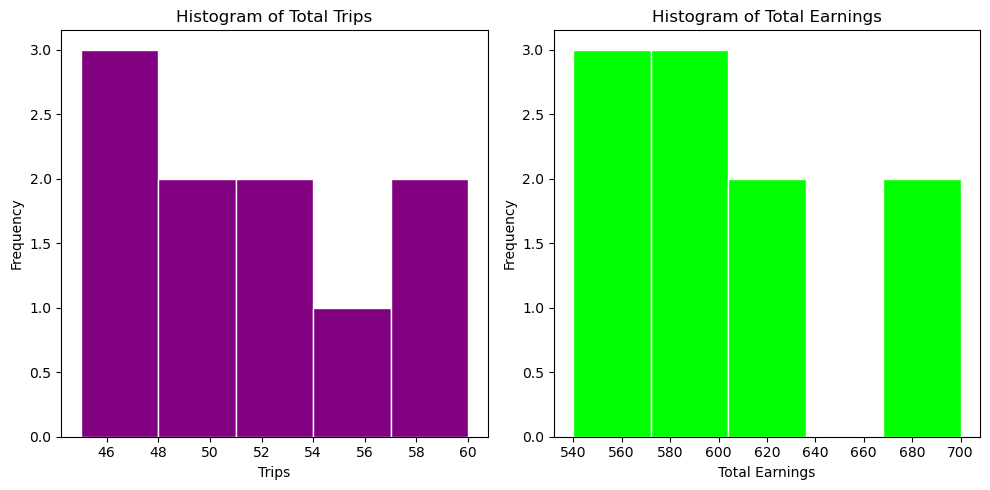

In [19]:

Total_Trips = [50, 45, 60, 55, 52, 46, 50, 57, 47, 52] #actual data values

# Total earning data. These are actual data values from the table above after cleaning the data just before statistics description.
total_earnings_data = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]

# Histogram graph
plt.figure(figsize=(10, 5))

# Total Trips
plt.subplot(1, 2, 1)
plt.hist(Total_Trips, bins=5, color='purple', edgecolor='white')
plt.title('Histogram of Total Trips')
plt.xlabel('Trips')
plt.ylabel('Frequency')

# Total Earnings
plt.subplot(1, 2, 2)
plt.hist(total_earnings_data, bins=5, color='lime', edgecolor='white')
plt.title('Histogram of Total Earnings')
plt.xlabel('Total Earnings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

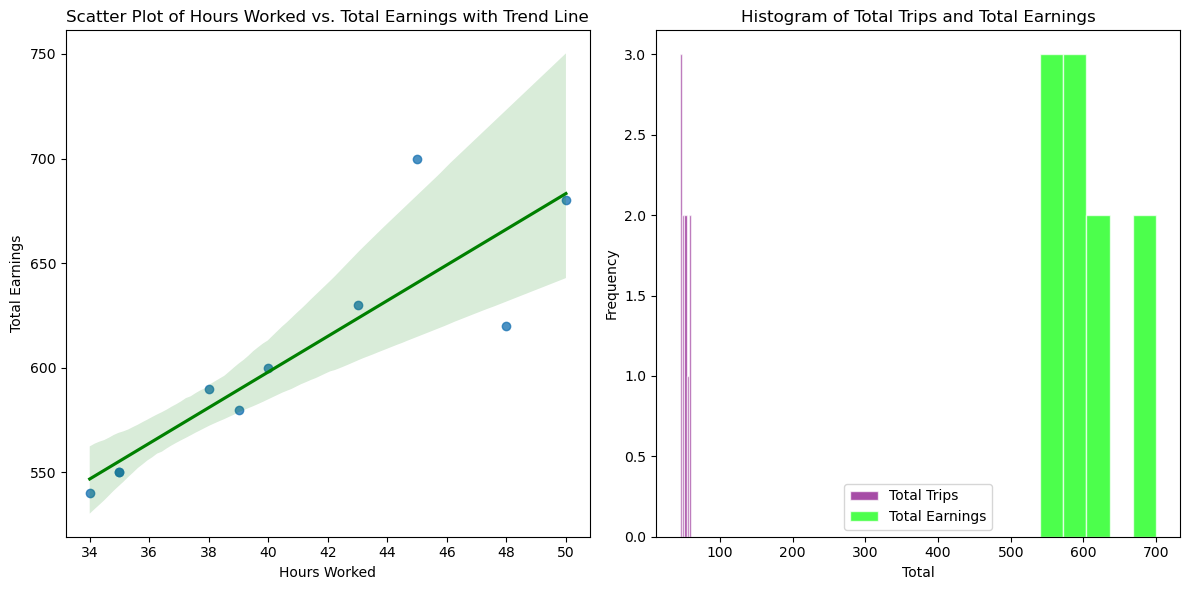

In [29]:
# Scatter Plot
hours_worked_data = [40, 35, 45, 50, 48, 34, 39, 43, 35, 38]
total_earnings_data = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]

# Histograms
Total_Trips = [50, 45, 60, 55, 52, 46, 50, 57, 47, 52]
total_earnings_data_hist = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]

# Scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
sns.regplot(x=hours_worked_data, y=total_earnings_data, scatter=True, line_kws={"color": "green"})
plt.title('Scatter Plot of Hours Worked vs. Total Earnings with Trend Line')
plt.xlabel('Hours Worked')
plt.ylabel('Total Earnings')

# Histograms
plt.subplot(1, 2, 2)
plt.hist(Total_Trips, bins=5, color='purple', edgecolor='white', alpha=0.7, label='Total Trips')
plt.hist(total_earnings_data_hist, bins=5, color='lime', edgecolor='white', alpha=0.7, label='Total Earnings')
plt.title('Histogram of Total Trips and Total Earnings')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

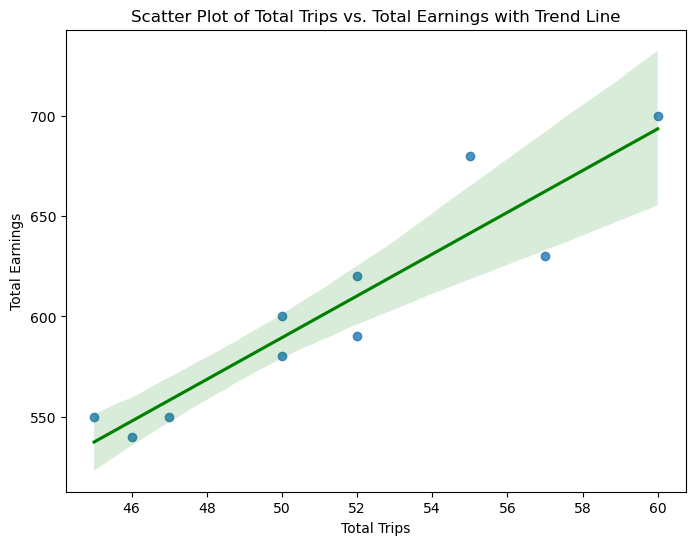

In [25]:
# Scatter Plot with Trend Line
plt.figure(figsize=(8, 6))
sns.regplot(x=Total_Trips, y=total_earnings_data, scatter=True, line_kws={"color": "green"})
plt.title('Scatter Plot of Total Trips vs. Total Earnings with Trend Line')
plt.xlabel('Total Trips')
plt.ylabel('Total Earnings')
plt.show()

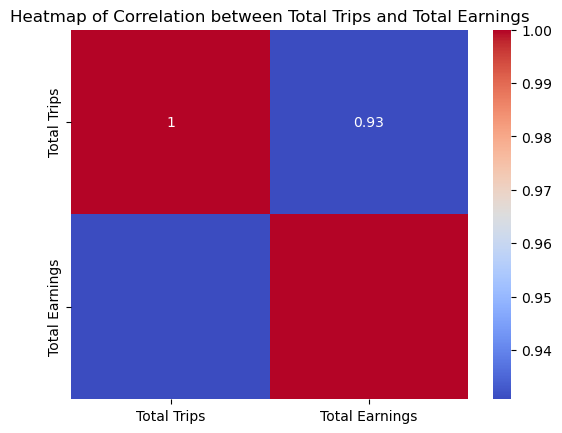

In [30]:
Total_Trips = [50, 45, 60, 55, 52, 46, 50, 57, 47, 52] #actual data values

# Total earning data. These are actual data values from the table above after cleaning the data just before statistics description.
total_earnings_data = [600, 550, 700, 680, 620, 540, 580, 630, 550, 590]
correlation_matrix = np.corrcoef(Total_Trips , total_earnings_data)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Total Trips', 'Total Earnings'], yticklabels=['Total Trips', 'Total Earnings'])
plt.title('Heatmap of Correlation between Total Trips and Total Earnings')
plt.show()

In [26]:
# From the above visualations and techniques of Total trips and Total earnings, it provides insights into efficiency and revenue generation. As the 
# number of total trips increases, there will be an increase in total earnings.

### Reflections on your learnings between this assignment and the previous one. What was different between Python and Excel? When will you use either of them?  If you could do this assignment over what would you do differently? What are the gaps in your programming or stats knowledge? (350 words)

Reflecting on my learnings between this assignment and the previous one, I noticed significant differences between Python and Excel for data analysis. In the previous assessment, we utilized Excel, where we had to conduct manual calculations. This was a challenge because it was cumbersome with long datasets. This experience highlighted the limitations of Excel for complex analyses, leading me to appreciate Python's power and flexibility, especially within the Jupyter Notebook environment.
During my assessment, I compared results between Python and Excel using my "Uber Insights" dataset, ultimately favoring Python for its dynamic capabilities. Despite facing challenges in data cleaning and having limited experience with certain libraries, Python enabled a more insightful analysis, showcasing its superiority for descriptive analysis tasks.
Moving forward, I would suggest using Excel for handling medium to small datasets, focusing on basic calculations and visualizations for its user-friendly interface. Python is better suited for tasks involving large datasets, complex analysis, or advanced statistical functions.
Looking back, there are things I could have done differently, particularly in the Excel assignment. I could have explored features like Data Tables and Goal Seek to automate calculations and leverage PivotTables and various chart types for quicker data analysis.
As for my programming and stats knowledge gaps, while I am familiar with Python, I lack expertise in data cleaning techniques and other libraries like Pandas, Matplotlib, and Seaborn. Additionally, my statistical foundation is not as strong, which may have hindered deeper analysis and interpretation of results.
To conclude, these assignments highlighted the shift from Excel's formula-based approach to Python's more programmatic approach, emphasizing the importance of programming skills and statistical understanding in effectively utilizing Python for data analysis.
